# Assignment 1


## Advanced ML 

## PGCP DSML IITR-TimesPro


### Submitted by - Sylvia Chadha


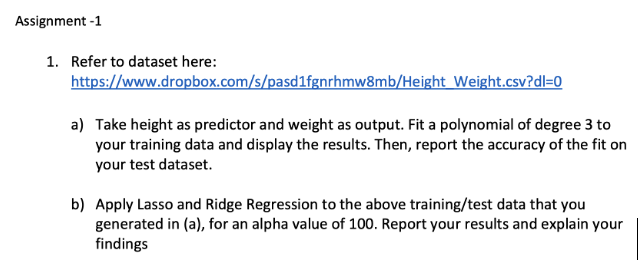

# <font color=blue>1a. Linear Regression and polynomial of degree 3 with height as predictor and weight as output

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


**Load the Dataset**

In [2]:
data = pd.read_csv('Height_weight.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
data.shape

(10000, 3)

There are 10,000 data points with 3 features in the given dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


**Split into features and target**

In [5]:
X = data['Height']    # Predictor variable
y = data['Weight']    # Output variable

**Split data into training and testing set**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Regression model expects a 2D array as input so we change shape of X_train & X_test as 2D
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)


In [7]:
# Display shape of train and test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 1), (8000,), (2000, 1), (2000,))

## Create a simple regression model for baseline


In [8]:
# Import 
from sklearn.linear_model import LinearRegression

# Instantiate the model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_train, y_train)

LinearRegression()

In [9]:
linear_reg.intercept_, linear_reg.coef_


(-352.84566494154797, array([7.7474654]))

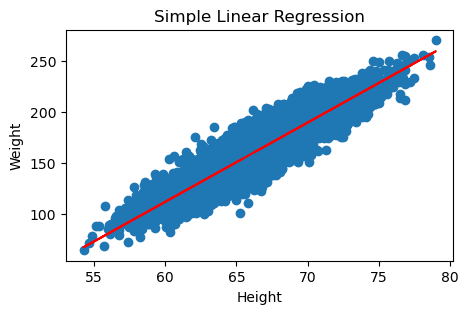

In [10]:
# Plot Simple Linear Regression model

plt.figure(figsize=(5,3))

y_pred = linear_reg.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = 'red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Simple Linear Regression');

## Create a polynomial regression model with degree 3


In [11]:
poly = PolynomialFeatures(degree=3)

# Fit_transform on training data and only transform on test data
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


**Check original as well as polynomial X_train & X_Test features**

In [12]:
X_train[0:3]

array([[65.38656672],
       [61.65992175],
       [59.90884476]])

In [13]:
X_poly_train[0:3]

array([[1.00000000e+00, 6.53865667e+01, 4.27540311e+03, 2.79553931e+05],
       [1.00000000e+00, 6.16599218e+01, 3.80194595e+03, 2.34427690e+05],
       [1.00000000e+00, 5.99088448e+01, 3.58906968e+03, 2.15017018e+05]])

In [14]:
X_test[0:3]

array([[62.73241741],
       [67.94518308],
       [68.35442896]])

In [15]:
X_poly_test[0:3]

array([[1.00000000e+00, 6.27324174e+01, 3.93535619e+03, 2.46874407e+05],
       [1.00000000e+00, 6.79451831e+01, 4.61654790e+03, 3.13672193e+05],
       [1.00000000e+00, 6.83544290e+01, 4.67232796e+03, 3.19374310e+05]])

**Import, Instantiate and Fit model**

In [16]:
# Import 
from sklearn.linear_model import LinearRegression

# Instantiate the model
poly_reg = LinearRegression()

# Fit the model
poly_reg.fit(X_poly_train, y_train)


LinearRegression()

In [17]:
poly_reg.coef_

array([ 0.00000000e+00, -1.85259474e+02,  2.91098837e+00, -1.45938536e-02])

In [18]:
# Add polynomial coeficients df to later compare with ridge and lasso

df_coef = pd.DataFrame({'poly_reg': poly_reg.coef_})

**Plot the model**

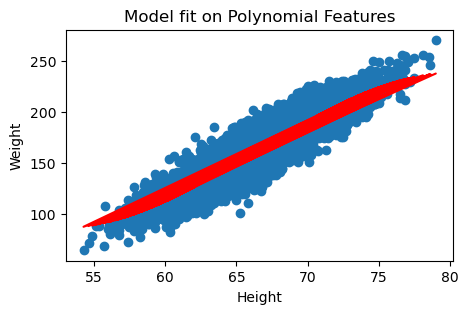

In [19]:
plt.figure(figsize=(5,3))

ypred_poly = poly_reg.predict(X_poly_train)
plt.scatter(X_train, y_train)                     # Original data
plt.plot(X_train, ypred_poly, color = 'red')      # Model fitted on Polynomial features
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Model fit on Polynomial Features');

## Model Fit on Simple Linear Regression vs Model fit on Polynomial Features

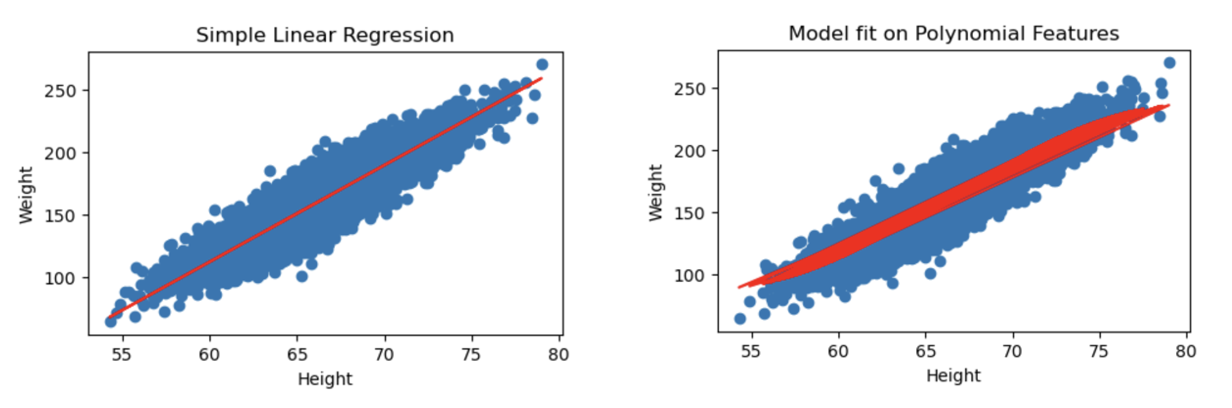

### From above plots we see that polynomial model is more flexible compared to  simple linear Regression.

**Evaluate model on test set**

In [20]:
# Predict by Linear Regression

score1 = linear_reg.score(X_test, y_test)
print('R^2 score on test data:', score1)

R^2 score on test data: 0.8582902668542705


In [21]:
# Predict by Polynomial Regression

score2 = poly_reg.score(X_poly_test, y_test)
print('R^2 score on test data:', score2)

R^2 score on test data: 0.8621376115088866


# <font color=blue>1b. Apply Lasso and Ridge to above training/test data you generated in (a), for an alpha value of 100. Report your results and explain your findings.

## Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=100).fit(X_poly_train, y_train) 


In [23]:
ridge_reg.coef_


array([ 0.00000000e+00, -8.88468195e-01,  1.35760908e-01, -7.08048638e-04])

In [24]:
df_coef['ridge_reg'] = ridge_reg.coef_


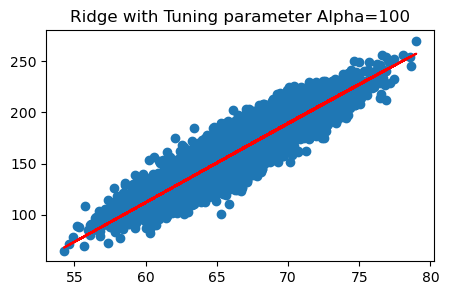

In [25]:

plt.figure(figsize=(5,3))
plt.scatter(X_train, y_train)                
ypred_rg = ridge_reg.predict(X_poly_train)    
plt.plot(X_train, ypred_rg,color='red')
plt.title('Ridge with Tuning parameter Alpha=100')
plt.show();

In [26]:
# Predict by Ridge Regression

score3 = ridge_reg.score(X_poly_test, y_test)
print('R^2 score on test data:', score3)

R^2 score on test data: 0.8585327886578663


## Lasso Regression

In [27]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=100).fit(X_poly_train, y_train)


In [28]:
lasso_reg.coef_

array([0.        , 0.        , 0.        , 0.00057972])

In [29]:
df_coef['lasso_reg'] = lasso_reg.coef_


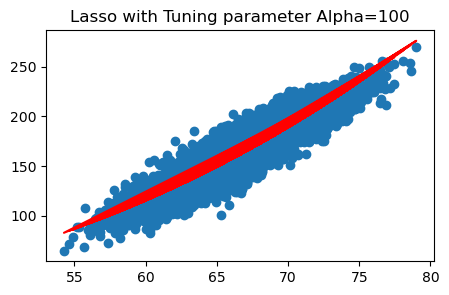

In [30]:
plt.figure(figsize=(5,3))
plt.scatter(X_train, y_train)                
ypred_ls = lasso_reg.predict(X_poly_train)    
plt.plot(X_train, ypred_ls,color='red')
plt.title('Lasso with Tuning parameter Alpha=100')
plt.show();


In [31]:
# Predict by Lasso Regression

score4 = lasso_reg.score(X_poly_test, y_test)
print('R^2 score on test data:', score4)

R^2 score on test data: 0.8544522764878263


## Results and Findings

### Analysing Ridge and Lasso Models

In [32]:
df_coef = df_coef.transpose()
df_coef

,0,1,2,3
poly_reg,0.0,-185.259474,2.910988,-0.014594
ridge_reg,0.0,-0.888468,0.135761,-0.000708
lasso_reg,0.0,0.000000,0.000000,0.000580


- We observe that the coefficients/slope of ridge regression are very less compared to the polymial model prepared on degree 3 features.
- Also for Lasso only one feature with non-zero coefficient is present which makes it simple and more interpretable model.
- In terms of accuracy, ridge gives an accuracy of 0.86 while lasso gives an accuracy of 0.85 on test set hence ridge gives slightly better prediction accuracy than lasso.

### Hence we can say that Ridge gives better accuracy however Lasso seems more interpretable due to reduced features.